## Import modules

In [86]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Define the Runge's function

$$
f(x) = \frac{1}{1 + 25^2}
$$

In [87]:
def runge(x: int) -> int:
    return 1 / (1 + 25 * x**2)

## Prepare data

In [88]:
class DataSet:
    def __init__(self, dataNum: int) -> None:
        self.x = np.random.uniform(-1, 1, dataNum).reshape(-1, 1)
        self.y = runge(self.x)
        self.x_t = torch.tensor(self.x, dtype=torch.float32)
        self.y_t = torch.tensor(self.y, dtype=torch.float32)

trainData = DataSet(800)
validData = DataSet(100)
testData  = DataSet(100)

## Design the Network

In [92]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.seq = nn.Sequential(
            nn.Linear(1, 10),
            nn.Tanh(),
            nn.Linear(10, 10),
            nn.Tanh(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.seq(x)

## Training epoch

 Epoch | trainLoss | validLoss 
-------|-----------|-----------
     0 |  0.242638 |  0.122680 
   100 |  0.008022 |  0.006700 
   200 |  0.000155 |  0.000121 
   300 |  0.000037 |  0.000033 
   400 |  0.000023 |  0.000021 
   500 |  0.000014 |  0.000013 
   600 |  0.000009 |  0.000008 
   700 |  0.000005 |  0.000005 
   800 |  0.000003 |  0.000003 
   900 |  0.000002 |  0.000002 
  1000 |  0.000002 |  0.000001 
  1100 |  0.000001 |  0.000001 
  1200 |  0.000001 |  0.000001 
  1300 |  0.000001 |  0.000001 
  1400 |  0.000001 |  0.000000 
  1500 |  0.000000 |  0.000000 
  1600 |  0.000000 |  0.000000 
  1700 |  0.000000 |  0.000000 
  1800 |  0.000000 |  0.000000 
  1900 |  0.000000 |  0.000000 

Final loss: 0.000000


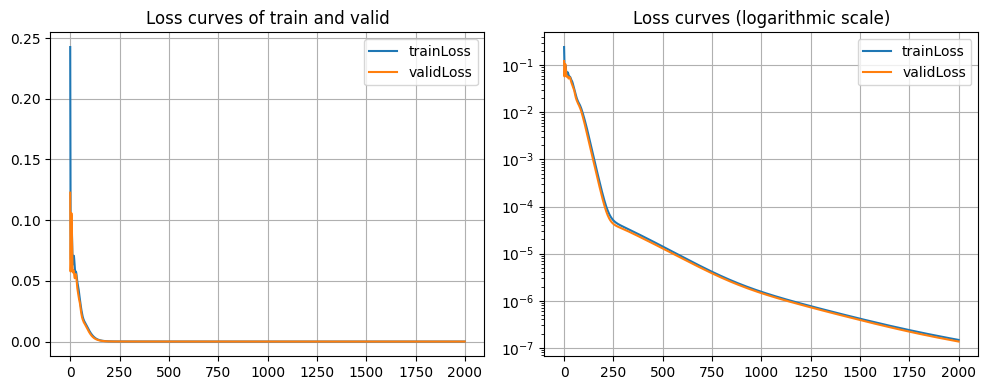

In [102]:
net = Net()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

trainEpoch = 2000
epochlist = np.arange(trainEpoch)
trainlosslist = []
validlosslist = []

print(" Epoch | trainLoss | validLoss ")
print("-------|-----------|-----------")

for epoch in range(trainEpoch):
    optimizer.zero_grad()
    y_pred = net(trainData.x_t)
    trainloss = criterion(y_pred, trainData.y_t)
    trainloss.backward()
    optimizer.step()

    y_valid = net(validData.x_t)
    validloss = criterion(y_valid, validData.y_t)

    trainlosslist.append(trainloss.item())
    validlosslist.append(validloss.item())
    if epoch % 100 == 0:
        print(f" {epoch:5d} | {trainloss.item():9.6f} | {validloss.item():9.6f} ")

print(f"\nFinal loss: {trainlosslist[-1]:.6f}")

fig1, axes1 = plt.subplots(1, 2, figsize=(10, 4))

axes1[0].plot(epochlist, trainlosslist, label='trainLoss')
axes1[0].plot(epochlist, validlosslist, label='validLoss')
axes1[0].legend()
axes1[0].grid(True)
axes1[0].set_title("Loss curves of train and valid")

axes1[1].plot(epochlist, trainlosslist, label='trainLoss')
axes1[1].plot(epochlist, validlosslist, label='validLoss')
axes1[1].set_yscale('log')
axes1[1].legend()
axes1[1].grid(True)
axes1[1].set_title("Loss curves (logarithmic scale)")

plt.tight_layout()
plt.show()

## Result display

testLoss: 0.000000


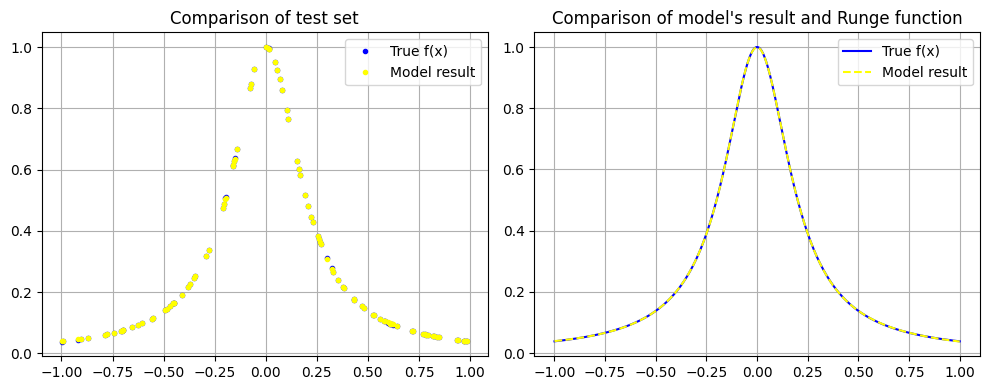

In [103]:
y_pred_t = net(testData.x_t)
y_pred = y_pred_t.detach().numpy()
loss = criterion(y_pred_t, testData.y_t)

print(f"testLoss: {loss:.6f}")

x_axis = np.linspace(-1, 1, 500).reshape(-1, 1)
x_axis_t = torch.tensor(x_axis, dtype=torch.float32)
y_runge = runge(x_axis)
y_net = net(x_axis_t).detach().numpy()

fig2, axes2 = plt.subplots(1, 2, figsize=(10, 4))

axes2[0].plot(testData.x, testData.y, '.', color='blue', label='True f(x)')
axes2[0].plot(testData.x, y_pred, '.', color='yellow', label='Model result')
axes2[0].legend()
axes2[0].grid(True)
axes2[0].set_title("Comparison of test set")

axes2[1].plot(x_axis, y_runge, color='blue', label='True f(x)')
axes2[1].plot(x_axis, y_net, color='yellow', label='Model result', linestyle='--')
axes2[1].legend()
axes2[1].grid(True)
axes2[1].set_title("Comparison of model's result and Runge function")

plt.tight_layout()
plt.show()